In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn
import geopandas as gpd

CURRENT_PATH = os.getcwd()
GENERAL_PATH = os.path.dirname(CURRENT_PATH)
DATA_PATH = os.path.join(GENERAL_PATH, "data")

In [4]:
hospitales_path = os.path.join(DATA_PATH, "denue_hospitales_shp\\conjunto_de_datos")

data = gpd.read_file(os.path.join(hospitales_path, "denue_inegi_62_.shp"))
data.set_index('id', inplace=True)
data.drop(columns=['www', 'correoelec', 'telefono'], inplace=True)
data.head()

,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,municipio,cve_loc,localidad,ageb,manzana,tipoUniEco,latitud,longitud,fecha_alta,geometry
id,,,,,,,,,,,,,,,,,,,,,
101363,02001621211002581000000000U5,DENTISTA MILITAR,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO BLANCO,CALLE,AMAZONAS,...,Ensenada,0001,Ensenada,7964,044,Fijo,31.845642,-116.601959,2014-12,POINT (-116.60196 31.84564)
69228,02004621211002811000000000U0,DENTISTA LOMELI,None,621211,Consultorios dentales del sector privado,0 a 5 personas,AVENIDA,BUCARELI,CALLE,CHICAGO,...,Tijuana,0001,Tijuana,0598,007,Fijo,32.489294,-117.041228,2010-07,POINT (-117.04123 32.48929)
7049128,02004621211016431000000000U1,DENTISTA OASIS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,BOULEVARD,REAL DE BAJA CALIFORNIA,BOULEVARD,REAL DE LAS LOMAS,...,Tijuana,0001,Tijuana,728A,006,Fijo,32.486737,-116.848466,2019-11,POINT (-116.84847 32.48674)
6914702,02002621211011581000000000U2,DENTISTA NIÑOS Y ADULTOS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO CULIACAN,AVENIDA,JOSE MARIA AGUAYO,...,Mexicali,0001,Mexicali,0269,025,Fijo,32.653502,-115.432872,2019-11,POINT (-115.43287 32.6535)
6959384,02004621211019351000000000U8,DENTISTA FIMBRES,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,DIAZ MIRON (CUARTA),CALLE,MIGUEL F. MARTINEZ (D),...,Tijuana,0001,Tijuana,0051,003,Fijo,32.532308,-117.042847,2019-11,POINT (-117.04285 32.53231)


In [5]:
data[data['nombre_act'].str.contains('hospital', case=False, na=False)]['codigo_act'].value_counts()

codigo_act
622112    2624
622111    2007
622311     915
621491     472
622312     159
622211      70
622212      42
621492      41
Name: count, dtype: int64

In [14]:
data[data['codigo_act'].str.contains('621') & data['nombre_act'].str.contains('hospital', case=False, na=False)]['nombre_act'].unique()

array(['Otros centros del sector privado para la atención de pacientes que no requieren hospitalización',
       'Otros centros del sector público para la atención de pacientes que no requieren hospitalización'],
      dtype=object)

In [27]:
cod_list = data[data['nombre_act'].str.contains('hospital', case=False, na=False)]['codigo_act'].unique()
print(f"Data original: {len(data)}")
data = data[data.codigo_act.isin(cod_list) & ~data['codigo_act'].astype('int64').isin([621491, 621492])]
print(f"Data filtrada: {len(data)}")
data.columns

Data original: 6330
Data filtrada: 5817


Index(['clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'tipoUniEco', 'latitud', 'longitud',
       'fecha_alta', 'geometry'],
      dtype='object')

In [31]:
construccion_path = os.path.join(DATA_PATH, "denue_construccion_shp\\conjunto_de_datos")

data_construccion = gpd.read_file(os.path.join(construccion_path, "denue_inegi_23_.shp"))
data_construccion.set_index('id', inplace=True)
data_construccion.drop(columns=['www', 'correoelec', 'telefono'], inplace=True)
data_construccion.head()

,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,municipio,cve_loc,localidad,ageb,manzana,tipoUniEco,latitud,longitud,fecha_alta,geometry
id,,,,,,,,,,,,,,,,,,,,,
9269036,05035237212000323000000000U3,CONSTRUCCIÓN DE OBRAS DE URBANIZACIÓN,None,237212,Construcción de obras de urbanización,0 a 5 personas,AVENIDA,SIERRA DEL SANTO,BOULEVARD,PROLONGACIÓN PASEO DE TECNOLÓGICO,...,Torreón,0001,Torreón,3499,017,Fijo,25.511097,-103.376920,2020-11,POINT (-103.37692 25.5111)
6729166,05018237212000053000000000U2,CONSTRUCCIÓN DE OBRAS DE URBANIZACIÓN,None,237212,Construcción de obras de urbanización,11 a 30 personas,CALLE,GENERAL BRAVO,CALLE,GARITA,...,Monclova,0001,Monclova,1241,030,Fijo,26.899410,-101.426094,2016-01,POINT (-101.42609 26.89941)
6723381,05035236221000433011000000U2,CONSTRUCCIÓN DE OBRAS DE URBANIZACIÓN,None,237212,Construcción de obras de urbanización,31 a 50 personas,CALLE,38,AVENIDA,JUAREZ,...,Torreón,0001,Torreón,0314,074,Fijo,25.538911,-103.407970,2016-01,POINT (-103.40797 25.53891)
6144170,05030237212000143000000000U6,CONSTRUCCIÓN DE OBRAS DE URBANIZACIÓN,None,237212,Construcción de obras de urbanización,0 a 5 personas,CALLE,28,None,CENTRAL,...,Saltillo,0001,Saltillo,2687,010,Fijo,25.403808,-100.946902,2010-07,POINT (-100.9469 25.40381)
6723473,05002237131000011011000000U6,CONSTRUCCIÓN DE OBRAS DE URBANIZACIÓN SIN NOMBRE,None,237212,Construcción de obras de urbanización,6 a 10 personas,CALLE,XICOTÉNCATL,CALLE,LA MADRID,...,Acuña,0001,Ciudad Acuña,1595,005,Fijo,29.333020,-100.945509,2016-01,POINT (-100.94551 29.33302)


In [54]:
print(len(data.cve_ent.unique()))
data[['cve_ent', 'entidad']].value_counts()

32


cve_ent  entidad                        
15       México                             485
14       Jalisco                            416
09       Ciudad de México                   402
19       Nuevo León                         340
30       Veracruz de Ignacio de la Llave    338
20       Oaxaca                             303
21       Puebla                             285
11       Guanajuato                         273
16       Michoacán de Ocampo                259
07       Chiapas                            236
02       Baja California                    221
08       Chihuahua                          194
28       Tamaulipas                         187
26       Sonora                             165
05       Coahuila de Zaragoza               162
25       Sinaloa                            153
12       Guerrero                           151
22       Querétaro                          126
31       Yucatán                            124
13       Hidalgo                            118

In [56]:
conteo_hospital = data['raz_social'].value_counts()
conteo_hospital

raz_social
INSTITUTO MEXICANO DEL SEGURO SOCIAL                                          396
IMSS                                                                          160
GOBIERNO FEDERAL                                                              105
GOBIERNO                                                                       93
INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO     84
                                                                             ... 
CENTRO HOSPITALARIO DE SAN JOSE AC                                              1
MATERNIDAD DEL CARMEN                                                           1
UNIDAD DE MEDICINA FAMILIAR NO 55                                               1
IMSS BIENESTAR SANTA MARIA DE LA PAZ                                            1
CENTRO CARDIOLOGICO DE ZACATECAS SC                                             1
Name: count, Length: 2547, dtype: int64

tipo_asent
COLONIA                  4282
BARRIO                    519
FRACCIONAMIENTO           353
LOCALIDAD                 207
PUEBLO                    104
MANZANA                    54
CIUDAD                     40
SECTOR                     29
EJIDO                      29
SECCION                    26
UNIDAD HABITACIONAL        19
CONJUNTO HABITACIONAL      16
SUPERMANZANA               15
RESIDENCIAL                12
AMPLIACION                 10
Name: count, dtype: int64


<Axes: xlabel='Conteo', ylabel='Tipo asentamiento'>

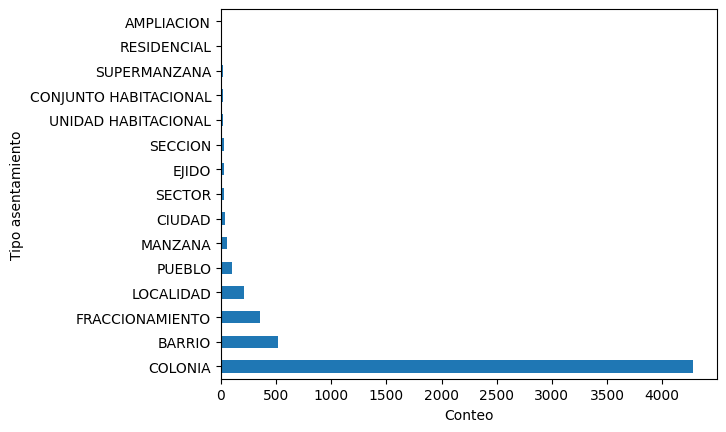

In [57]:
conteo_por_asentamiento = data.tipo_asent.value_counts()
print(conteo_por_asentamiento[:15])
conteo_por_asentamiento[:15].plot(kind='barh', xlabel="Conteo", ylabel="Tipo asentamiento")

tipoCenCom
HOSPITAL, CENTRO MEDICO O CLIN    290
EDIFICIO COMERCIAL Y DE SERVIC     48
CENTRO Y PLAZA COMERCIAL           41
TIANGUIS, BAZAR O PULGA            10
PARQUE INDUSTRIAL                   6
ZONA INDUSTRIAL                     3
CIUDAD INDUSTRIAL                   2
PASAJE Y ANDADOR COMERCIAL          2
HOTELES                             1
MERCADO PUBLICO                     1
Name: count, dtype: int64


<Axes: ylabel='tipoCenCom'>

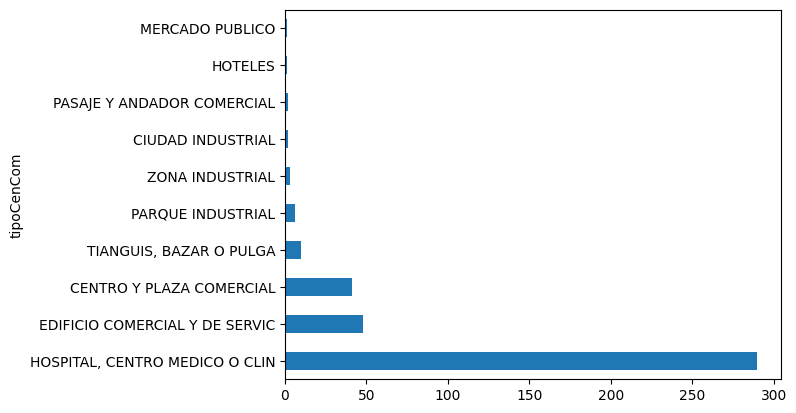

In [58]:
conteo_plaza = data.tipoCenCom.value_counts()
print(conteo_plaza)
conteo_plaza.plot(kind='barh')

<Axes: xlabel='fecha_alta'>

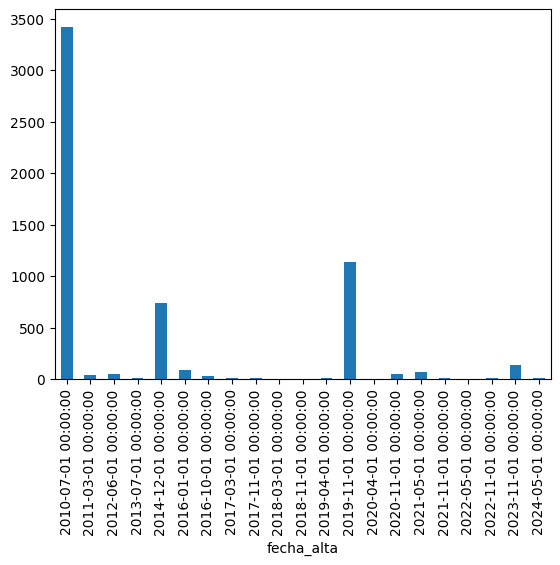

In [59]:
data.fecha_alta = data.fecha_alta.apply(lambda x: x.replace(' ', '-'))
data.fecha_alta = pd.to_datetime(data.fecha_alta, format="%Y-%m")
data.fecha_alta.sort_values().value_counts(sort=False).plot(kind='bar')

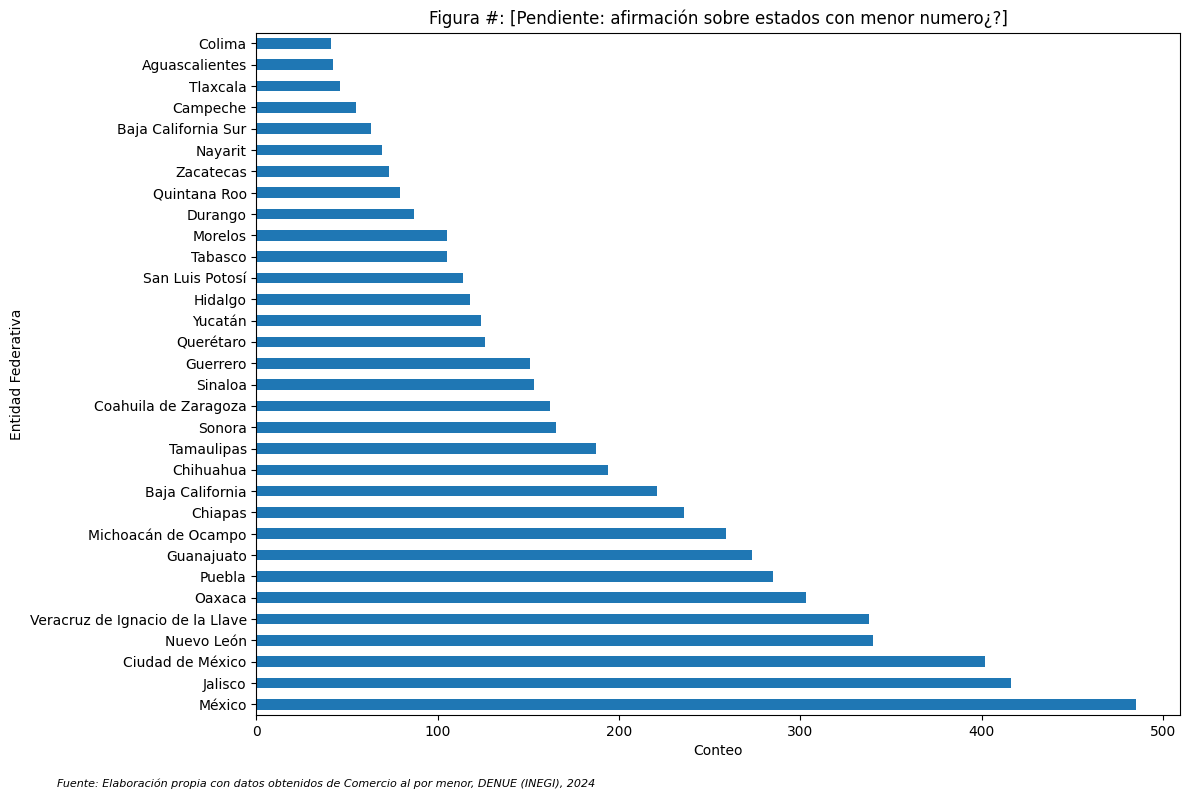

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))

data.entidad.value_counts().plot(kind='barh', ax=ax, title="Figura #: [Pendiente: afirmación sobre estados con menor numero¿?]", 
                                 xlabel="Conteo", ylabel="Entidad Federativa")

plt.figtext(0.5, 0.01, "Fuente: Elaboración propia con datos obtenidos de Comercio al por menor, DENUE (INEGI), 2024", 
            ha="right", fontsize=8, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

<Axes: >

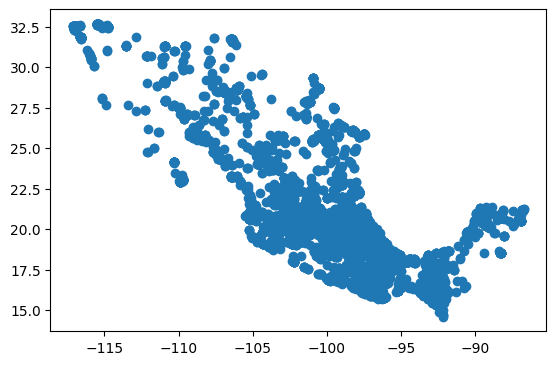

In [61]:
data.plot()

In [62]:
from shapely.geometry import Point

mexico_path = os.path.join(DATA_PATH, 'Mexico')
mexico = gpd.read_file(os.path.join(mexico_path, 'mexican-states.shp'))
print(mexico.crs)

EPSG:4326


c:\Users\Memit\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\Documentos\ITAM\Dataton\dataton_env\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: c:\Users\Memit\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\Documentos\ITAM\Dataton\Repositorio\data\Mexico\mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [ ]:
seccion_path = os.path.join(DATA_PATH, 'secciones_shp')
secciones = gpd.read_file(os.path.join(seccion_path, 'SECCION.shp'))
secciones.set_index('ID', inplace=True)
print(secciones.shape)
secciones.head(3)

(70753, 9)


,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_,geometry
ID,,,,,,,,,
39365,4,1,7,1,1,2,0.0,None,"POLYGON ((1199620.931 922633.121, 1199518.513 ..."
65994,24,1,2,1,1,2,0.0,None,"POLYGON ((86309.24 1154525.934, 86330.026 1154..."
2105,3,1,10,1,1,2,0.0,None,"POLYGON ((-971912.856 1477780.432, -971478.878..."


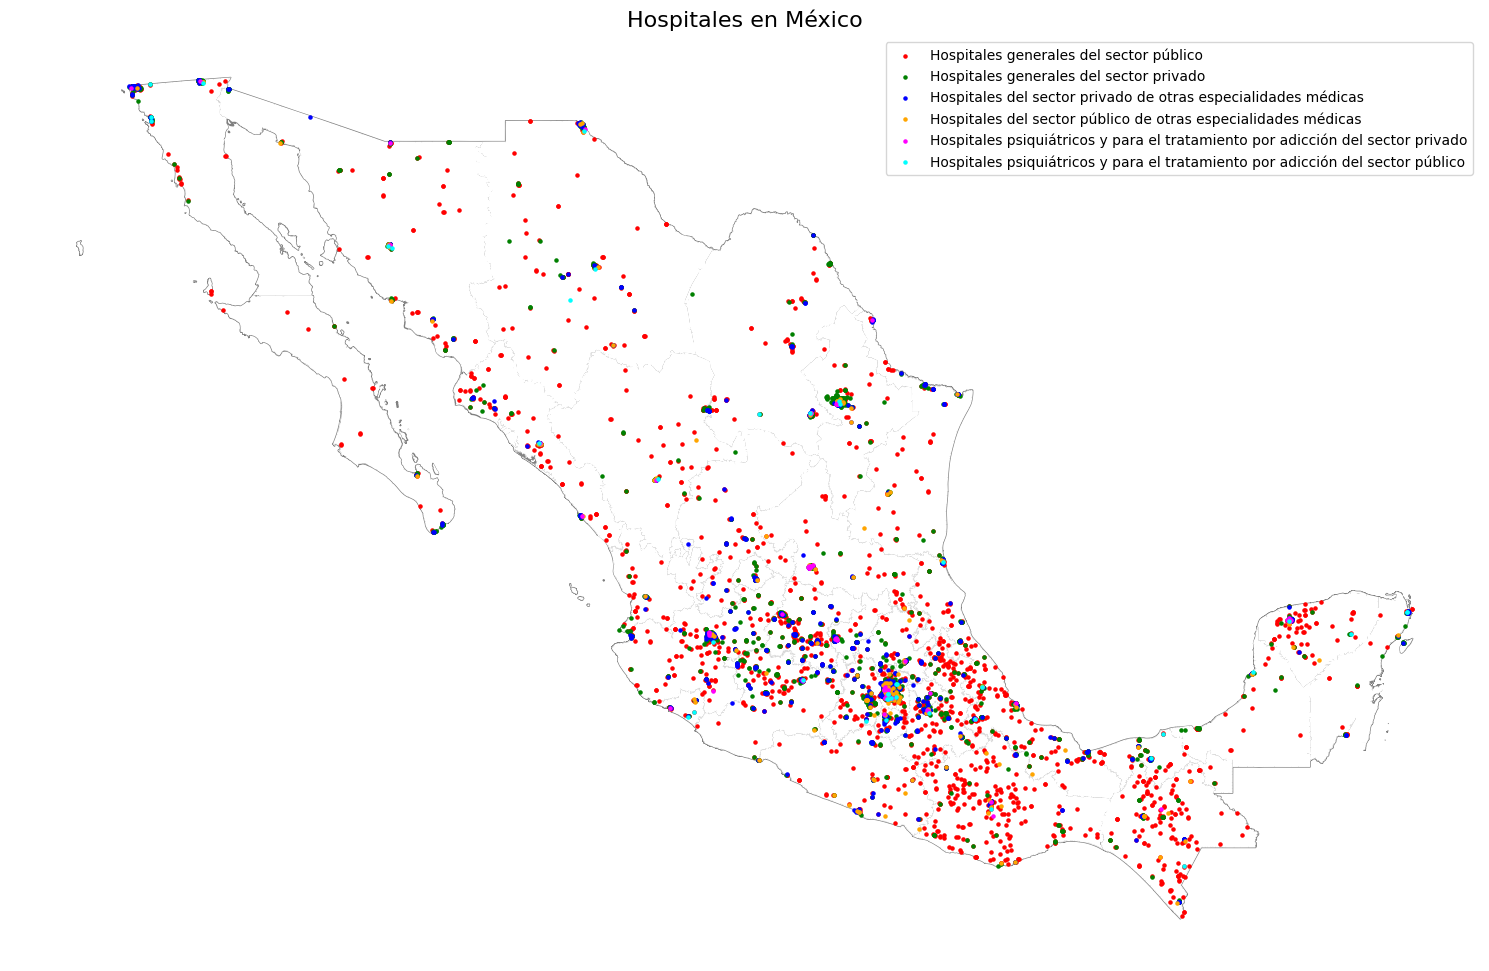

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
mexico.plot(ax=ax, color = 'white', edgecolor='gray')
secciones.to_crs(data.crs).plot(ax=ax, color = 'white')

tipo_hospitales = data['nombre_act'].unique()
colors = ['red', 'green', 'blue', 'orange', 'magenta', 'cyan']

for category, color in zip(tipo_hospitales, colors):
    subset = data[data['nombre_act'] == category]
    subset.plot(ax=ax, color=color, markersize=5, label=category)

# data_shp.plot(ax=ax, color = 'red', markersize = 5)
plt.title('Hospitales en México', fontsize=16)
ax.set_axis_off()
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
joined_gdf = gpd.sjoin(data, secciones.to_crs(data.crs), how="inner", predicate="intersects")
print(data.shape)
print(joined_gdf.shape)
joined_gdf.head(3)

(5817, 39)
(5816, 48)


,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,geometry,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_
id,,,,,,,,,,,,,,,,,,,,,
58542,02002622112000387000000000U6,HOSPITAL GENERAL 5 DE DICIEMBRE,None,622112,Hospitales generales del sector público,251 y más personas,AVENIDA,AVENIDA DE LA LIBERTAD,CALLE,CALLE DEL HOSPITAL,...,POINT (-115.47481 32.64539),256,2,2,3,2,264,2,0.0,None
141454,02005622112000076001000000U8,HOSPITAL GENERAL DE PLAYAS DE ROSARITO,INSTITUTO DE SERVICIOS DE SALUD PUBLICA DEL ES...,622112,Hospitales generales del sector público,251 y más personas,CALLE,GALILEA,CARRETERA,DE CUOTA A ENSENADA,...,POINT (-117.05576 32.36351),1317,2,9,15,5,1365,2,0.0,None
151002,02001622112000153000000000U4,HOSPITAL GENERAL DE SUB ZONA MEDICINA FAMILIAR 13,INSTITUTO MEXICANO DEL SEGURO SOCIAL,622112,Hospitales generales del sector público,11 a 30 personas,CALLE,NINGUNO,CALLE,NINGUNO,...,POINT (-115.18735 28.03452),159,2,3,17,1,165,2,0.0,None


In [78]:
nearestes_joined_gdf = gpd.sjoin_nearest(data.loc[list(set(data.index)-set(joined_gdf.index))], secciones.to_crs(data.crs), how="inner", max_distance=10,
                                distance_col='distance')
nearestes_joined_gdf[['cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ENTIDAD', 'MUNICIPIO', 'DISTRITO_L', 'SECCION']]

c:\Users\Memit\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\Documentos\ITAM\Dataton\dataton_env\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ENTIDAD,MUNICIPIO,DISTRITO_L,SECCION
id,,,,,,,,,,
8718323,18,Nayarit,020,Bahía de Banderas,0236,Desarrollo Punta Mita,18,4,16,110


In [79]:
joined_gdf_complete = pd.concat([joined_gdf, nearestes_joined_gdf], axis = 0)
joined_gdf_complete

,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_,distance
id,,,,,,,,,,,,,,,,,,,,,
58542,02002622112000387000000000U6,HOSPITAL GENERAL 5 DE DICIEMBRE,None,622112,Hospitales generales del sector público,251 y más personas,AVENIDA,AVENIDA DE LA LIBERTAD,CALLE,CALLE DEL HOSPITAL,...,256,2,2,3,2,264,2,0.0,None,NaN
141454,02005622112000076001000000U8,HOSPITAL GENERAL DE PLAYAS DE ROSARITO,INSTITUTO DE SERVICIOS DE SALUD PUBLICA DEL ES...,622112,Hospitales generales del sector público,251 y más personas,CALLE,GALILEA,CARRETERA,DE CUOTA A ENSENADA,...,1317,2,9,15,5,1365,2,0.0,None,NaN
151002,02001622112000153000000000U4,HOSPITAL GENERAL DE SUB ZONA MEDICINA FAMILIAR 13,INSTITUTO MEXICANO DEL SEGURO SOCIAL,622112,Hospitales generales del sector público,11 a 30 personas,CALLE,NINGUNO,CALLE,NINGUNO,...,159,2,3,17,1,165,2,0.0,None,NaN
153536,02004622112000207000000000U2,HOSPITAL GENERAL DE TIJUANA,INSTITUTO DE SERVICIOS DE SALUD PÚBLICA DEL ES...,622112,Hospitales generales del sector público,251 y más personas,AVENIDA,PADRE FRANCISCO EUSEBIO KINO,CALLE,GENERAL JOSE VASCONCELOS,...,861,2,5,9,4,881,2,0.0,None,NaN
147673,02002622112000293000000000U6,HOSPITAL FAMILIAR 3,None,622112,Hospitales generales del sector público,11 a 30 personas,AVENIDA,SAN LIUS RIO COLORADO,AVENIDA,FRANCISCO ZARCO,...,550,2,7,1,2,561,2,0.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607289,32048622311000042000000000U2,CLINICA DE MATERNIDAD SANTA ROSA,None,622311,Hospitales del sector privado de otras especia...,6 a 10 personas,CALLE,JOSEFA ORTIZ DE DOMINGUEZ,CALLE,IGNACIO ZARAGOZA,...,19314,32,2,16,48,1490,2,0.0,None,NaN
4613325,32036622112000011000000000U4,CLINICA DE IMSS OPORTUNIDADES,INSTITUTO MEXICANO DEL SEGURO SOCIAL,622112,Hospitales generales del sector público,0 a 5 personas,CALLE,PRUDENCIO GARCIA PEREZ,CALLE,ÁLVARO GARCIA CARRILLO,...,18897,32,2,11,36,1042,3,0.0,None,NaN
4647784,32020622111000013000000000U6,CLINICA DE EMERGENCIAS JEREZ,CLINICA DE EMERGENCIAS JEREZ SA,622111,Hospitales generales del sector privado,11 a 30 personas,CALLE,CALLE DE LAS ARTES,CALLE,ROSALES,...,18549,32,2,10,20,634,2,0.0,None,NaN


In [80]:
joined_gdf_complete.SECCION.value_counts()

SECCION
437     31
1116    21
1117    20
220     18
881     18
        ..
3748     1
4930     1
3712     1
1625     1
4978     1
Name: count, Length: 2657, dtype: int64

In [41]:
data_construccion.columns

Index(['clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'tipoUniEco', 'latitud', 'longitud',
       'fecha_alta', 'geometry'],
      dtype='object')

In [44]:
data_construccion.codigo_act = data_construccion.codigo_act.astype('int64')
data_construccion[data_construccion['codigo_act'] == 236221][['nom_estab', 'raz_social', 'nombre_act']]

,nom_estab,raz_social,nombre_act
id,,,
9302272,COESA,CONTRATISTA SA DE CV,Edificación de inmuebles comerciales y de serv...
416525,COMERCIALIZADORA CONSTRUCCIONES ZUMA,COMERCIALIZADORA CONSTRUCCIONES ZUMA SA DE CV,Edificación de inmuebles comerciales y de serv...
6694193,CIVIL INC,CIVIL INC SA DE CV,Edificación de inmuebles comerciales y de serv...
6143808,CASA ECOLOGICAS DE MADERA CYFOC CORPORATIVO ID...,CORPORATIVO INDUSTRIAL Y DE FOMENTO CONTRUCTIVO,Edificación de inmuebles comerciales y de serv...
9277493,CEMEXCONCRETOS,CEMEX CONCRETOS SA DE CV,Edificación de inmuebles comerciales y de serv...
...,...,...,...
4005079,TI EMPRESARIAL,None,Edificación de inmuebles comerciales y de serv...
9320077,DALAJ,DALAJ CONSTRUCTORES SA DE CV,Edificación de inmuebles comerciales y de serv...
6455056,TRALIMEX,TRALIMEX SA DE CV,Edificación de inmuebles comerciales y de serv...


In [81]:
data.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [87]:
joined_gdf_complete[joined_gdf_complete['nom_estab'].str.contains('cardiologia', case=False, na=False)]['nombre_act'].value_counts()

nombre_act
Hospitales del sector privado de otras especialidades médicas    12
Hospitales generales del sector público                           2
Hospitales generales del sector privado                           1
Hospitales del sector público de otras especialidades médicas     1
Name: count, dtype: int64